In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

 Demo of numerical instabilities

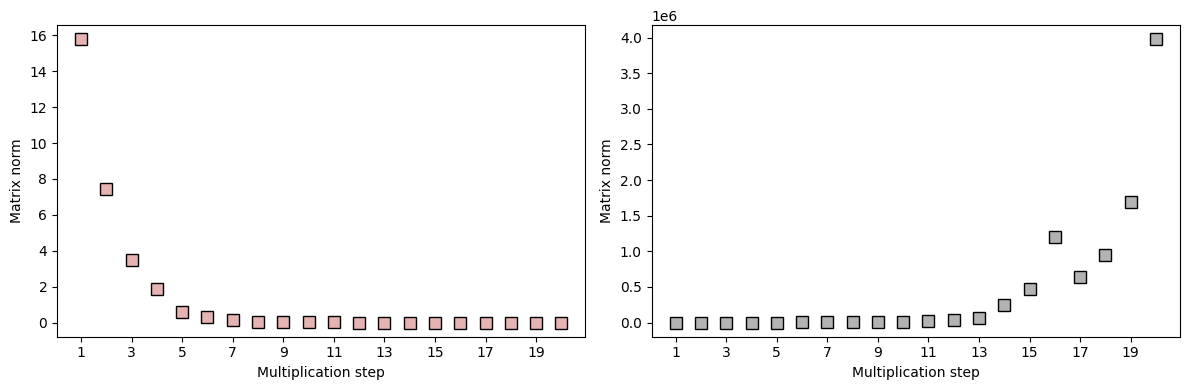

In [4]:
scalefact = 2

# number of mults
nummults = 20

#init random matrices
Asmol = torch.randn(30,30)
Abig  = torch.randn(30,30)

#init results
norms = torch.zeros(nummults,2)

for i in range(nummults):
    Asmol *= torch.randn(30,30) * (1/scalefact) #mult with random matrices and using scale factor
    norms[i,0] = torch.norm(Asmol)

    Abig *= torch.randn(30,30) * scalefact
    norms[i,1] = torch.norm(Abig)

# draw the plots
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(range(1,nummults+1),norms[:,0],'ks',markersize=9,markerfacecolor=[.9,.7,.7])
axs[1].plot(range(1,nummults+1),norms[:,1],'ks',markersize=9,markerfacecolor=[.7,.7,.7])

for a,t in zip(axs,['smaller','larger']):
    a.set(xticks=range(1,nummults+1,2),xlabel='Multiplication step',ylabel='Matrix norm')

plt.tight_layout()
plt.show()


In [5]:
Asmol  #this is a small matrix as we mult with 1/scalefactor

tensor([[-6.1081e-12, -1.6412e-17,  1.3400e-11,  1.3168e-11, -4.0113e-20,
          4.8554e-12, -7.0017e-11, -1.3332e-07,  5.3856e-12, -3.7707e-15,
         -2.1526e-08,  1.3115e-10,  4.0126e-16, -3.3923e-10,  5.7273e-10,
         -5.3644e-10, -1.9274e-09, -1.1514e-09,  5.2061e-15,  4.2462e-13,
          7.3303e-12, -1.1530e-09,  3.1910e-17, -3.8834e-20,  2.7420e-09,
         -1.4613e-10,  2.9524e-10, -5.2869e-12,  3.4334e-08,  1.7996e-11],
        [ 6.3735e-10,  1.0592e-14, -1.7574e-10, -3.9988e-09, -4.2901e-09,
          2.8548e-13, -9.2427e-15,  1.6444e-12, -1.8908e-10, -3.6475e-12,
          6.7343e-13, -1.1784e-16, -1.5583e-10,  1.8806e-13,  1.0422e-13,
         -8.8643e-13,  3.0193e-13,  1.0414e-13,  3.9338e-10, -6.6876e-12,
         -1.2259e-13, -1.3158e-11, -5.0639e-15, -1.2015e-11,  1.5214e-11,
         -5.3975e-15,  4.0341e-18, -1.6909e-12, -5.6750e-12,  8.4998e-13],
        [-1.1446e-12, -3.9649e-18, -2.8952e-10, -6.7480e-13,  2.1738e-12,
          4.8937e-12,  3.3217e-13,  

In [6]:
Abig #this is big as we mult with scalefactor

tensor([[-1.7500e+01,  4.2772e-02,  1.1116e+03,  9.4009e+01,  1.9318e-02,
         -2.4810e-03, -4.8410e+01,  3.5065e+01,  1.5561e+04, -4.2361e+01,
          9.0350e-02,  1.3634e+01, -4.4969e+01,  3.7749e+01,  5.4110e-01,
          7.9988e+05, -9.7824e-01, -1.2258e-03, -9.6702e-02, -9.4052e-01,
          7.6806e-05,  3.7902e+01,  8.1081e+00,  6.5571e-02, -4.4942e+02,
          2.7585e-01, -9.6836e-04,  2.9003e-01,  2.5443e+01,  6.6416e+01],
        [ 1.5972e+00, -1.3648e+01, -9.5974e+01, -2.4275e+00, -5.7972e-01,
         -1.4188e-01,  3.5406e-02, -1.9923e-02, -1.1542e+01, -5.1557e-01,
          4.1982e-02,  4.6904e+01, -5.2586e-03,  3.8025e+03, -8.5851e-01,
         -9.1523e-01,  1.2885e+01,  6.0120e+01,  1.0501e+00, -1.4401e-03,
         -7.9583e-01, -2.2395e-04, -1.4324e-03, -3.4574e-02,  1.1640e+00,
          1.2879e-01, -1.6518e+01,  3.2334e-01, -1.0795e+01,  2.1321e+03],
        [-3.4017e+01, -1.1917e+01, -3.9106e+00, -9.0314e+01, -2.7981e+00,
          7.0535e-05, -3.7686e+01, -

 create a matirx(activation matrix)


In [7]:
n_in = 3
n_out =10
# 3x10 matrix
A = torch.randn(n_in,n_out)*2 + 3
torch.round(A)

tensor([[ 1.,  2.,  4.,  2.,  2.,  1.,  5., -0.,  4.,  7.],
        [ 2.,  5.,  3., -1.,  5.,  0.,  7.,  5.,  1.,  4.],
        [ 3.,  5.,  3.,  3., -2.,  0.,  4.,  3.,  4.,  0.]])

create a LayerNorm object instance

In [8]:
layernorm = nn.LayerNorm(n_out) # this corresponds to no of columns in the matrix
# we can specify the full matrix to apply layernorm to all dimensions

layernorm

#eps is Epsilon, a small no added into 
# deno when calculating S.D of the data (prevents numerical instability)


LayerNorm((10,), eps=1e-05, elementwise_affine=True)

In [9]:
# add layernorm to weight matrix
normA = layernorm(A)
print('Original matrix:\n',torch.round(A))
print('\n Layer normed matrix:\n',torch.round(normA))

Original matrix:
 tensor([[ 1.,  2.,  4.,  2.,  2.,  1.,  5., -0.,  4.,  7.],
        [ 2.,  5.,  3., -1.,  5.,  0.,  7.,  5.,  1.,  4.],
        [ 3.,  5.,  3.,  3., -2.,  0.,  4.,  3.,  4.,  0.]])

 Layer normed matrix:
 tensor([[-1., -0.,  1., -0., -0., -1.,  1., -1.,  0.,  2.],
        [-1.,  1., -0., -2.,  1., -1.,  2.,  1., -1.,  0.],
        [ 0.,  1.,  0.,  0., -2., -1.,  1.,  0.,  1., -1.]],
       grad_fn=<RoundBackward0>)


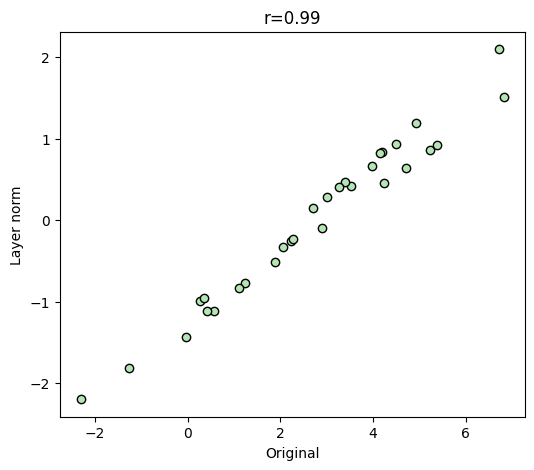

In [12]:
# how does layernorm change the matrix??

#convenience variables
a1 = A.detach().flatten()
a2 = normA.detach().flatten()

#correlate b/w them
r = torch.sum((a1-a1.mean())* (a2-a2.mean()))
r /= torch.sqrt(torch.sum((a1-a1.mean())**2) * torch.sum((a2-a2.mean())**2))

plt.figure(figsize=(6,5))
plt.plot(a1,a2,'ko',markerfacecolor=[.7,.9,.7])

plt.gca().set(xlabel='Original',ylabel='Layer norm',title=f'r={r:.2f}')
plt.show()

#it did do something on the data
   #corr coeff not 1
   # values not lying on a perfect diagonal

# so it changed some values, and also  changed some other values in diff ways


In [14]:
print('ORIGINAL: mean across columns for each row:')
print(f' {torch.mean(A,axis=1)}\n')
print('LAYERNORM: mean across columns for each row:')
print(f' {torch.mean(normA,axis=1).detach()}\n')

print('ORIGINAL: std across columns for each row:')
print(f' {torch.std(A,axis=1)}\n')
print('LAYERNORM: std across columns for each row:')
print(f' {torch.std(normA,axis=1).detach()}\n')

print('\n\nLAYENORM: mean across rows for each column:')
print(f' {torch.mean(A,axis=0).detach()}\n')
print('LAYERNORM: std across rows for each col:')
print(f' {torch.std(normA,axis=0).detach()}\n')

#originaly mean across col was 2, 3 etc
# after applying layernorm it becomes small (close to 0)
#similaryly std becomes around 1

# means across rows is not normalised, as we specified layernorm only onto columns 

ORIGINAL: mean across columns for each row:
 tensor([2.7023, 3.1422, 2.3953])

LAYERNORM: mean across columns for each row:
 tensor([ 1.1921e-08, -4.1723e-08, -4.1723e-08])

ORIGINAL: std across columns for each row:
 tensor([2.0212, 2.5632, 2.2571])

LAYERNORM: std across columns for each row:
 tensor([1.0541, 1.0541, 1.0541])



LAYENORM: mean across rows for each column:
 tensor([1.8199, 4.1277, 3.1950, 1.3975, 1.5556, 0.6392, 5.1722, 2.8664, 2.9230,
        3.7696])

LAYERNORM: std across rows for each col:
 tensor([0.7045, 0.7527, 0.3892, 1.1553, 1.4552, 0.1768, 0.3643, 1.2353, 0.8645,
        1.5288])



In [15]:
# inspect the layernorm para
print(f"Value of 'gamma' (stretch/scale param): {layernorm.weight}\n")
print(f"Value of 'beta' (shift param): {layernorm.bias}\n")

#these are learnable para (required_param=True)

Value of 'gamma' (stretch/scale param): Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True)

Value of 'beta' (shift param): Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)



In [17]:
# modify gamma and beta
layernorm.weight = torch.nn.Parameter(torch.ones(n_out)*3) #gamma = 3
layernorm.bias = torch.nn.Parameter(torch.ones(n_out)*5) #beta = 5
layernorm.weight

Parameter containing:
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], requires_grad=True)

In [18]:
normAnew = layernorm(A)

print('ORIGINAL: mean across columns for each row:')
print(f' {torch.mean(A,axis=1)}\n')
print('ORIGINAL: std across columns for each row:')
print(f' {torch.std(A,axis=1)}\n')

print('NEW LAYERNORM: mean across columns for each row:')
print(f' {torch.mean(normAnew,axis=1).detach()}\n')
print('NEW LAYERNORM: std across columns for each row:')
print(f' {torch.std(normAnew,axis=1).detach()}\n')

#the mean is 5 (beta) and std = 3 (gamma)

ORIGINAL: mean across columns for each row:
 tensor([2.7023, 3.1422, 2.3953])

ORIGINAL: std across columns for each row:
 tensor([2.0212, 2.5632, 2.2571])

NEW LAYERNORM: mean across columns for each row:
 tensor([5.0000, 5.0000, 5.0000])

NEW LAYERNORM: std across columns for each row:
 tensor([3.1623, 3.1623, 3.1623])

